# Difference in Difference Prescriptions

In [57]:
import pandas as pd
import numpy as np
import altair as alt

Prescriptions = pd.read_csv("Prescription-Pop-merge.csv")
Prescriptions["Morphine_gram_Equiv_rate"] = Prescriptions["Prescr_rate"] / 1000


In [58]:
pre_FL = Prescriptions[
    (Prescriptions.State == "Florida") & (Prescriptions.Year < 2010)
]  # filtering for pre policy years for Florida
post_FL = Prescriptions[
    (Prescriptions.State == "Florida") & (Prescriptions.Year >= 2010)
]  # post policy year for florida
pre_contr = Prescriptions[
    (Prescriptions.Treatment == "Control") & (Prescriptions.Year < 2010)
]  # filtering for pre policy years for thr control states:North Carolina,Georgia and Kentucky
post_contr = Prescriptions[
    (Prescriptions.Treatment == "Control") & (Prescriptions.Year >= 2010)
]  # filtering for post policy years for thr control states:North Carolina,Georgia and Kentucky


In [59]:
from plotnine import *


def diffIndiff(
    prepolicy_contr,
    postpolicy_contr,
    prepolicy_treatment,
    postpolicy_treatment,
    xvar,
    yvar,
    policyyear,
):
    m = (
        ggplot()
        # plot all chosen states,  pre policy year
        + geom_smooth(
            prepolicy_contr,
            aes(x=xvar, y=yvar, color="Treatment"),
            method="lm",
        )
        # plot all chosen states, post policy year
        + geom_smooth(
            postpolicy_contr,
            aes(x=xvar, y=yvar, color="Treatment"),
            method="lm",
        )
        # plot treatment, pre policy year
        + geom_smooth(
            prepolicy_treatment,
            aes(x=xvar, y=yvar, color="Treatment"),
            method="lm",
        )
        # plot treatment, post policy year
        + geom_smooth(
            postpolicy_treatment,
            aes(x=xvar, y=yvar, color="Treatment"),
            method="lm",
        )
        + geom_vline(xintercept=policyyear, linetype="dotted")
        + xlab("Year")
        + theme_classic(base_family="Times")
        + scale_x_continuous(breaks=[2006, 2008, 2010, 2012, 2014], limits=[2006, 2014])
    )
    return m


/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Diff-Diff-FLOpioid-Shipments.png


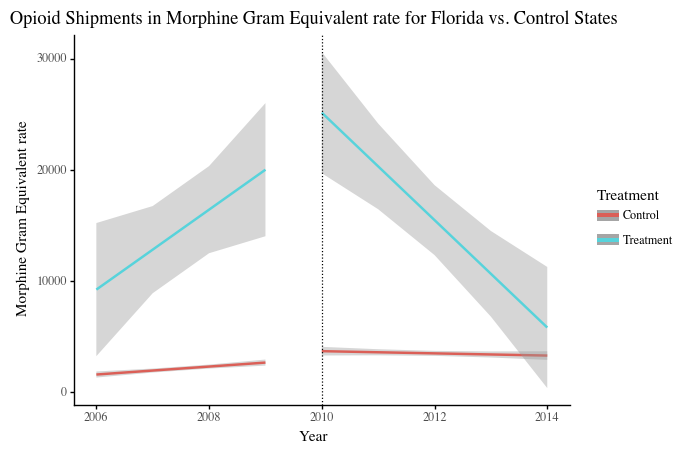

<ggplot: (298464247)>

In [60]:
m = (
    diffIndiff(
        pre_contr, post_contr, pre_FL, post_FL, "Year", "Morphine_gram_Equiv_rate", 2010
    )
    + labs(
        title="Opioid Shipments in Morphine Gram Equivalent rate for Florida vs. Control States",
        color="Treatment",
    )
    + ylab("Morphine Gram Equivalent rate")
)
#ggsave(plot=m, filename="Diff-Diff-FLOpioid-Shipments.png")
m


In [61]:
from plotnine import *


def pre_post(prepolicy_treatment, postpolicy_treatment, xvar, yvar, policyyear):
    m = (
        ggplot()
        # plot treatment, pre policy year
        + geom_smooth(
            prepolicy_treatment,
            aes(x=xvar, y=yvar,color='State'),
            method="lm",
        )
        # plot treatment, post policy year
        + geom_smooth(
            postpolicy_treatment,
            aes(x=xvar, y=yvar,color='State'),
            method="lm",
        )
        + geom_vline(xintercept=policyyear, linetype="dotted")
        + xlab("Year")
        + theme_classic(base_family="Times")
        + scale_x_continuous(breaks=[2006, 2008, 2010, 2012, 2014], limits=[2006, 2014])
    )
    return m


/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Pre-Post-FLOpioid-Shipments.png


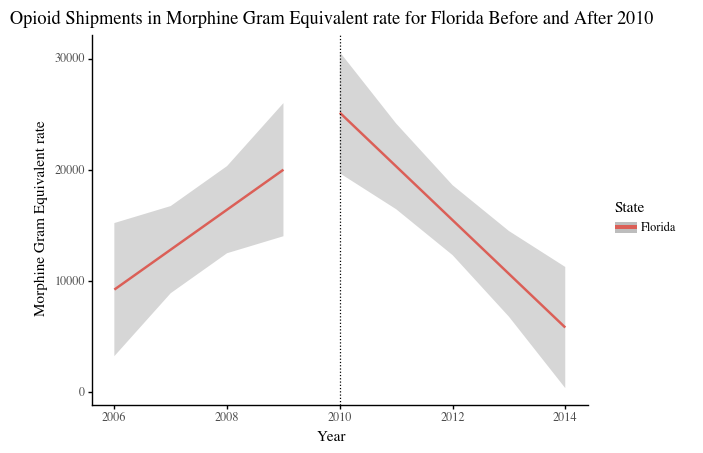

<ggplot: (309608174)>

In [63]:
t = (
    pre_post(pre_FL, post_FL, "Year", "Morphine_gram_Equiv_rate", 2010)
    + labs(
        title="Opioid Shipments in Morphine Gram Equivalent rate for Florida Before and After 2010"
    )
    + ylab("Morphine Gram Equivalent rate")
)
#ggsave(plot=t,filename='Pre-Post-FLOpioid-Shipments.png')
t
